In [1]:
import math
import numpy as np
from time import time as t
from matplotlib import pyplot as plt

**1. Implemente o Método de Jacobi e o Método de Gauss-Seidel. Realize as mesmas tarefas da lista anterior com estes métodos. As comparações da terceira questão da lista anterior devem incluir os resultados destes métodos iterativos, além dos resultados dos métodos anteriores.**

In [2]:
def metodoJacobi(A, B, x0, tol, max):
  
    k = 1
    n = A.shape[0]
    x = np.zeros(n)

    while k <= max:
        for i in range(0, n):
            x[i] = 1.0/A[i,i] * (-np.dot(A[i,0:n], x0) + A[i,i] * x0[i] + B[i])
            if (np.linalg.norm(x - x0, np.inf) < tol):
                return x
        k += 1
        x0 = x.copy()
    print('O método não convergiu após a quantidade máxima de iterações')

In [3]:
def metodoGaussSeidel(A, B, x0, tol, max):

    k = 1
    n = A.shape[0]
    x = np.zeros(n)

    while k <= max:
        for i in range(0, n):
            if i == 0:
                x[i] = (1.0/A[i,i]) * (B[i] - np.dot(A[i,0:n], x0) + (A[i,i] * x0[i]))
            else:
                x[i] = (1.0/A[i,i]) * (B[i] - np.dot(A[i,0:i], x[0:i]) - np.dot(A[i, (i+1):n], x0[(i+1):n]))
            if (np.linalg.norm(x - x0, np.inf) < tol):
                return x
    k += 1
    x0 = x.copy()
    print('O método não convergiu após a quantidade máxima de iterações')

In [4]:
A = np.array([[4, 1, 2],[3, 5, 1],[1, 1, 3]])
B = [4,7,3]

x0 = np.zeros(3)

print(f'Metodo de Jacobi: {metodoJacobi(A, B, x0, 10**-6, 100)}')
print(f'Metodo de Gauss Seidel: {metodoJacobi(A, B, x0, 10**-6, 100)}')

Metodo de Jacobi: [0.50000036 0.99999948 0.49999954]
Metodo de Gauss Seidel: [0.50000036 0.99999948 0.49999954]


**2. Aproveitando a função implementada na terceira questão da segunda lista, implemente uma nova função que plote, além do gráfico de uma função y = f(x), um conjunto de pontos X ⊂ R².**

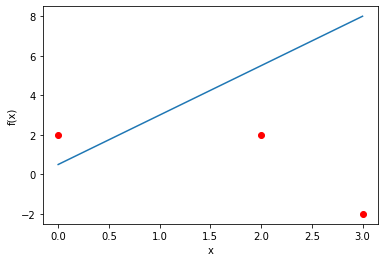

In [5]:
def funcao(x, coeficientes, n):
    y = 0 
    for i in range(n+1):
        y += coeficientes[i] * (x**i)
    return y

def gerarGrafico(f, pontos, delta, coeficientes, n):

    x = []
    y = []
    pontos_x = pontos[:, 0]
    pontos_y = pontos[:, 1]
    a = min(pontos_x)
    b = max(pontos_x)
   
    while(a <= b):
        x.append(a)
        y.append(funcao(a, coeficientes, n))
        a += delta

    plt.plot(x, y)
    plt.scatter(pontos_x, pontos_y, c = 'red')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.show()


coeficientes = [0.5, 2.5]
pontos = np.array([[0, 2], [2, 2], [3, -2]])
gerarGrafico(funcao, pontos, 0.25, coeficientes, len(coeficientes)-1)

**3. Adapte a formulação do ajuste linear de mínimos quadrados a dados, de forma que a função ajustada seja um polinômio de grau *n*, onde são dados como entrada um conjunto de pontos X ⊂ R² e o número inteiro *n*. Crie três exemplos, com graus distintos *n* ≥ 2 e |X| > 2*n*. Use a função implementada
na segunda questão para visualizar os resultados.**

In [6]:
def encontrarPivo(M, n):
    
    for pivo in range(n-1):
        if M[pivo] != 0:
            return pivo
    return -1


def eliminacaoGaussiana(A, n):
    
    result = n *[0]

    for i in range(n-1):
        pivo = encontrarPivo(A[i], n)
        if pivo == -1:
            return 'Não há solução única'
        if pivo != i:
            for n in range(0, n-2):
                A[pivo,i], A[0,i] = A[0,i], A[pivo,i]
        for j in range(i+1, n):
            Aji = A[j,i]/A[i,i]
            A[j] = A[j] - np.dot(Aji, A[i])
    
    if A[n-1,n-1] == 0:
        return 'Não há solução única'
  
    result[n-1] = A[n-1,n] / A[n-1,n-1]

    for k in range(n-1, -1, -1):
        soma = 0
        for j in range(k+1, n):
            soma += A[k,j] * result[j]
        result[k] = (A[k,n] - soma) / A[k,k]
  
    return result

In [7]:
def minimosQuadrados(pontos, n, delta):
    A = np.array(np.ones(pontos.shape[0]))
    y = pontos[:, 1]

    for i in range(1, n+1):
        A = np.c_[A, (pontos[:, 0])**i]
    coeficientes = eliminacaoGaussiana(np.c_[A.T @ A, A.T @ y], np.c_[A.T @ A, A.T @ y].shape[0])
    gerarGrafico(funcao, pontos, delta, coeficientes, n)

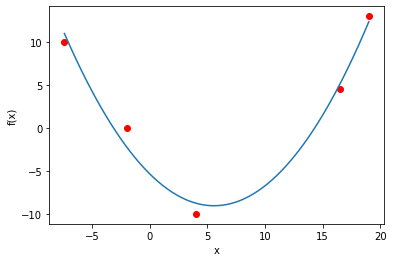

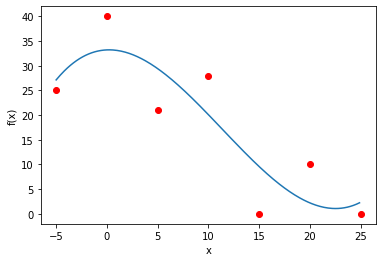

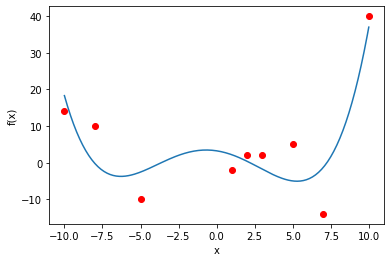

In [8]:
delta = 0.1
pontos1 = np.array([[-2, 0], [4, -10], [-7.4, 10], [19, 13], [16.5, 4.5]])  #5 pontos
pontos2 = np.array([[-5, 25], [0, 40], [5, 21], [10, 28], [15, 0], [20, 10], [25, 0]]) #7 pontos
pontos3 = np.array([[-10, 14], [-8, 10], [1, -2], [-5, -10], [2, 2], [5, 5], [3, 2], [7, -14], [10, 40]]) #9 pontos

minimosQuadrados(pontos1, 2, delta) #grau 2
minimosQuadrados(pontos2, 3, delta) #grau 3
minimosQuadrados(pontos3, 4, delta) #grau 4

**4. Repita a mesma tarefa da questão anterior, com os mesmos exemplos, usando polinômios de Lagrange de grau *n* = |X| − 1.**

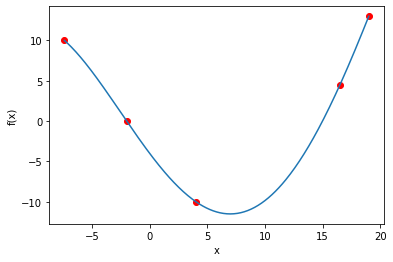

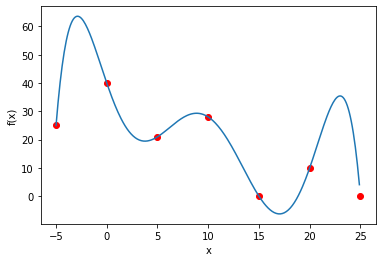

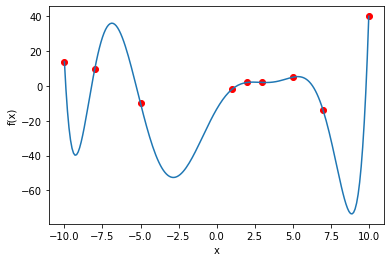

In [9]:
delta = 0.1
pontos1 = np.array([[-2, 0], [4, -10], [-7.4, 10], [19, 13], [16.5, 4.5]])  #5 pontos
pontos2 = np.array([[-5, 25], [0, 40], [5, 21], [10, 28], [15, 0], [20, 10], [25, 0]]) #7 pontos
pontos3 = np.array([[-10, 14], [-8, 10], [1, -2], [-5, -10], [2, 2], [5, 5], [3, 2], [7, -14], [10, 40]]) #9 pontos

minimosQuadrados(pontos1, len(pontos1)-1, delta)  #grau 4
minimosQuadrados(pontos2, len(pontos2)-1, delta)  #grau 6
minimosQuadrados(pontos3, len(pontos3)-1, delta)  #grau 8